#### Question 1

In [55]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

def get_column(data, index):

    #your code here ***********************
    data = pd.DataFrame(data)
    result = data.iloc[:, index]
    # print(result)

    return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X,y

In [56]:
#Multiple choices:
#Question 1:
X,y = prepare_data('/content/drive/MyDrive/Colab Notebooks/Practice/advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Question 2

In [58]:
# compute output and loss
def predict(x1, x2, x3, w1, w2, w3, b):

  #your code here ***********************
  result = w1*x1 + w2*x2 + w3*x3 + b

  return result

def compute_loss(y_hat, y):

  #your code here ***********************
  result = (y_hat - y)*(y_hat - y)

  return result

# def compute_loss_mae(y_hat, y):

  #your code here ***********************

  # return result

# compute gradient
def compute_gradient_wi(xi, y, y_hat):

  #your code here ***********************
  dl_dwi = 2 * xi *(y_hat - y)

  return dl_dwi

def compute_gradient_b(y, y_hat):

  #your code here ***********************
  dl_db = 2 *(y_hat - y)

  return dl_db

# update weights
def update_weight_wi(wi, dl_dwi, lr):

  #your code here ***********************
  wi = wi - lr * dl_dwi

  return wi

def update_weight_b(b, dl_db, lr):

  #your code here ***********************
  b = b - lr * dl_db

  return b

In [59]:
#Multiple choices:
#Question 2:
y_p = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

1.0


In [60]:
#Multiple choices:
#Question 3:
l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


In [61]:
#Multiple choices:
#Question 4:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [62]:
#Multiple choices:
#Question 5:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [63]:
#Multiple choices:
#Question 6:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [64]:
#Multiple choices:
#Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)


0.50001


In [65]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0

    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

print(initialize_params())

(0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)


In [66]:

def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

          # update parameters
          w1 = update_weight_wi(w1, dl_dw1, lr)
          w2 = update_weight_wi(w2, dl_dw2, lr)
          w3 = update_weight_wi(w3, dl_dw3, lr)
          b  = update_weight_b(b, dl_db, lr)

          # logging
          losses.append(loss)
  return (w1,w2,w3,b, losses)

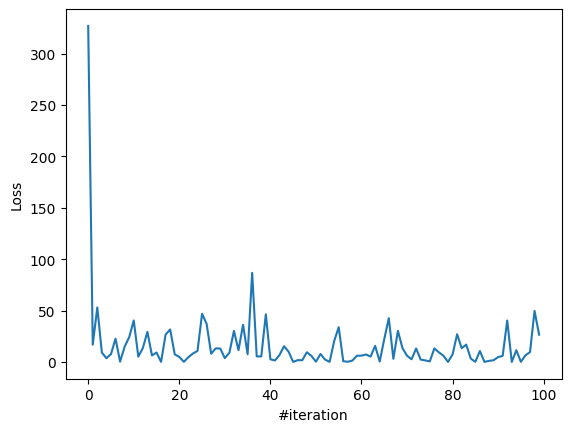

In [67]:
X,y = prepare_data('/content/drive/MyDrive/Colab Notebooks/Practice/advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [68]:
#Multiple choices:
#Question 8:
X,y = prepare_data('/content/drive/MyDrive/Colab Notebooks/Practice/advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


#### Inference

In [69]:
#Multiple choices:
#Question 9:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X,y = prepare_data('/content/drive/MyDrive/Colab Notebooks/Practice/advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823
